In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Telco-Customer-Churn.csv")

In [3]:
from IPython.display import display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### Replacing the blanks with 0 as tenure is 0 and no total charges are recorded.
#### Also "Total Charges" should be in float.

In [6]:
df['TotalCharges'] = df['TotalCharges'].replace(" ", "0")
df['TotalCharges'] = df['TotalCharges'].astype("float")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df.isnull().sum().sum()

np.int64(0)

In [9]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df['customerID'].duplicated().sum()

np.int64(0)

In [12]:
def convert(value):
    if value == 1:
        return "yes"
    else:
        return "no"

df['SeniorCitizen'] = df['SeniorCitizen'].apply(convert)

### Converted 1/0 values to yes/no to make it easier to understand.

In [13]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,no,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,no,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,no,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,yes,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes
7042,3186-AJIEK,Male,no,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.50,No


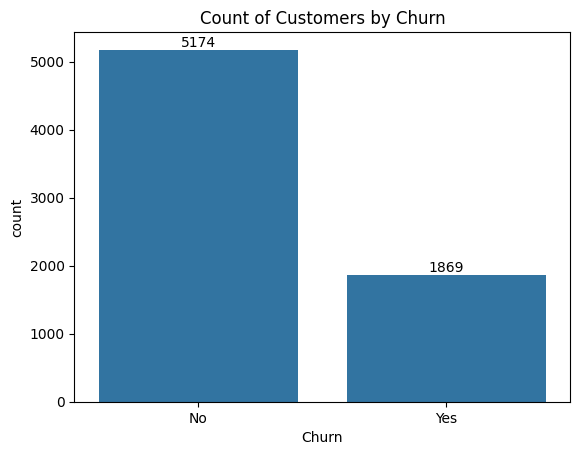

In [27]:
ax = sns.countplot(x= df['Churn'])
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Churn")
plt.show()

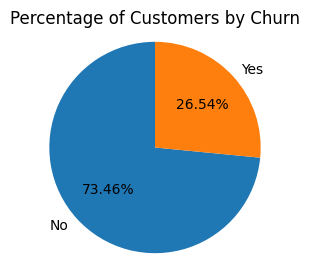

In [29]:
plt.figure(figsize = (3,3))
churn_counts = df['Churn'].value_counts()
# Plot pie chart
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.2f%%', startangle=90)
plt.title('Percentage of Customers by Churn')
plt.axis('equal')  # Equal aspect ratio for a perfect circle
plt.show()

##### From the above pie chart we can conclude that 26.54% customers have churned out.
#### Now let's explore the reason behind it.

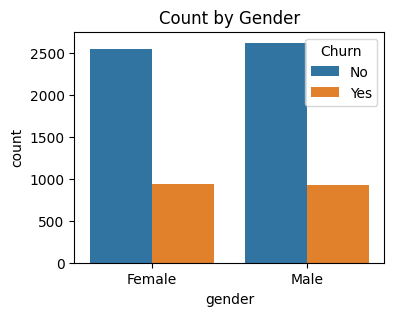

In [34]:
plt.figure(figsize= (4,3))
sns.countplot(x= df['gender'], hue = df['Churn'])
plt.title('Count by Gender')
plt.show()

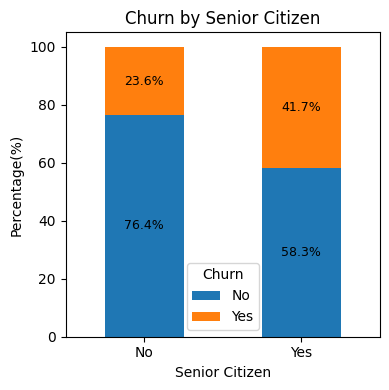

In [49]:
counts = pd.crosstab(df['SeniorCitizen'], df['Churn'])

# Convert to % within each SeniorCitizen group
counts_percent = counts.div(counts.sum(axis=1), axis=0) * 100

ax = counts_percent.plot(kind='bar', stacked=True, figsize=(4,4))

#Add % labels
for i, row in enumerate(counts_percent.values):
    bottom = 0
    for pct in row:
        ax.text(i, bottom + pct / 2, f'{pct:.1f}%', ha='center', va='center', fontsize=9)
        bottom += pct

plt.title('Churn by Senior Citizen')
plt.xlabel('Senior Citizen')
plt.ylabel('Percentage(%)')
plt.xticks([0,1], ['No', 'Yes'], rotation=0)
plt.legend(title='Churn')
plt.tight_layout()
plt.show()

#### From the above figure, we can infer that comparatively a greater number of people in the Senior Citizen category have churned out.

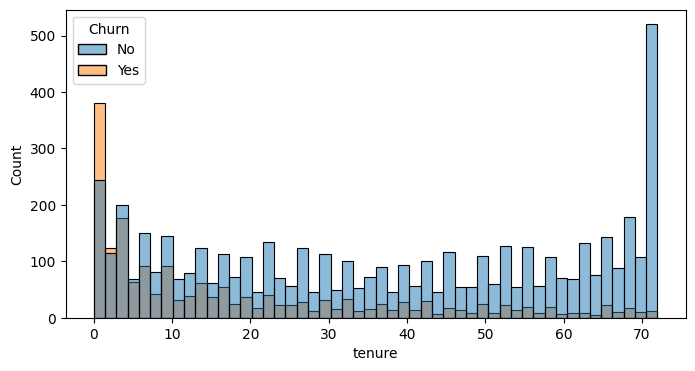

In [53]:
plt.figure(figsize = (8,4))
sns.histplot(x= df['tenure'], bins = 50, hue = df['Churn'])
plt.show()

#### People who have used our services for a long time have stayed but those who have used the services only for 1-2 months have churned out.

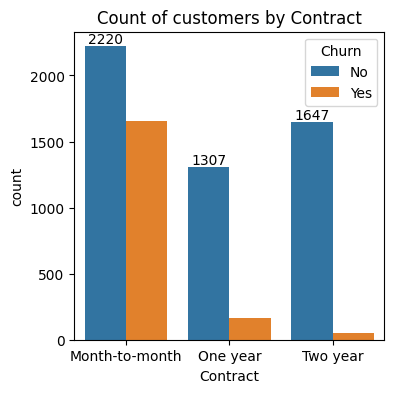

In [56]:
plt.figure(figsize= (4,4))
ax = sns.countplot(x= df['Contract'], hue = df['Churn'])
ax.bar_label(ax.containers[0])
plt.title('Count of customers by Contract')
plt.show()

#### People who have month to month contract are more likely to churn out as compared to those who have 1 or 2 years contract.

In [57]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

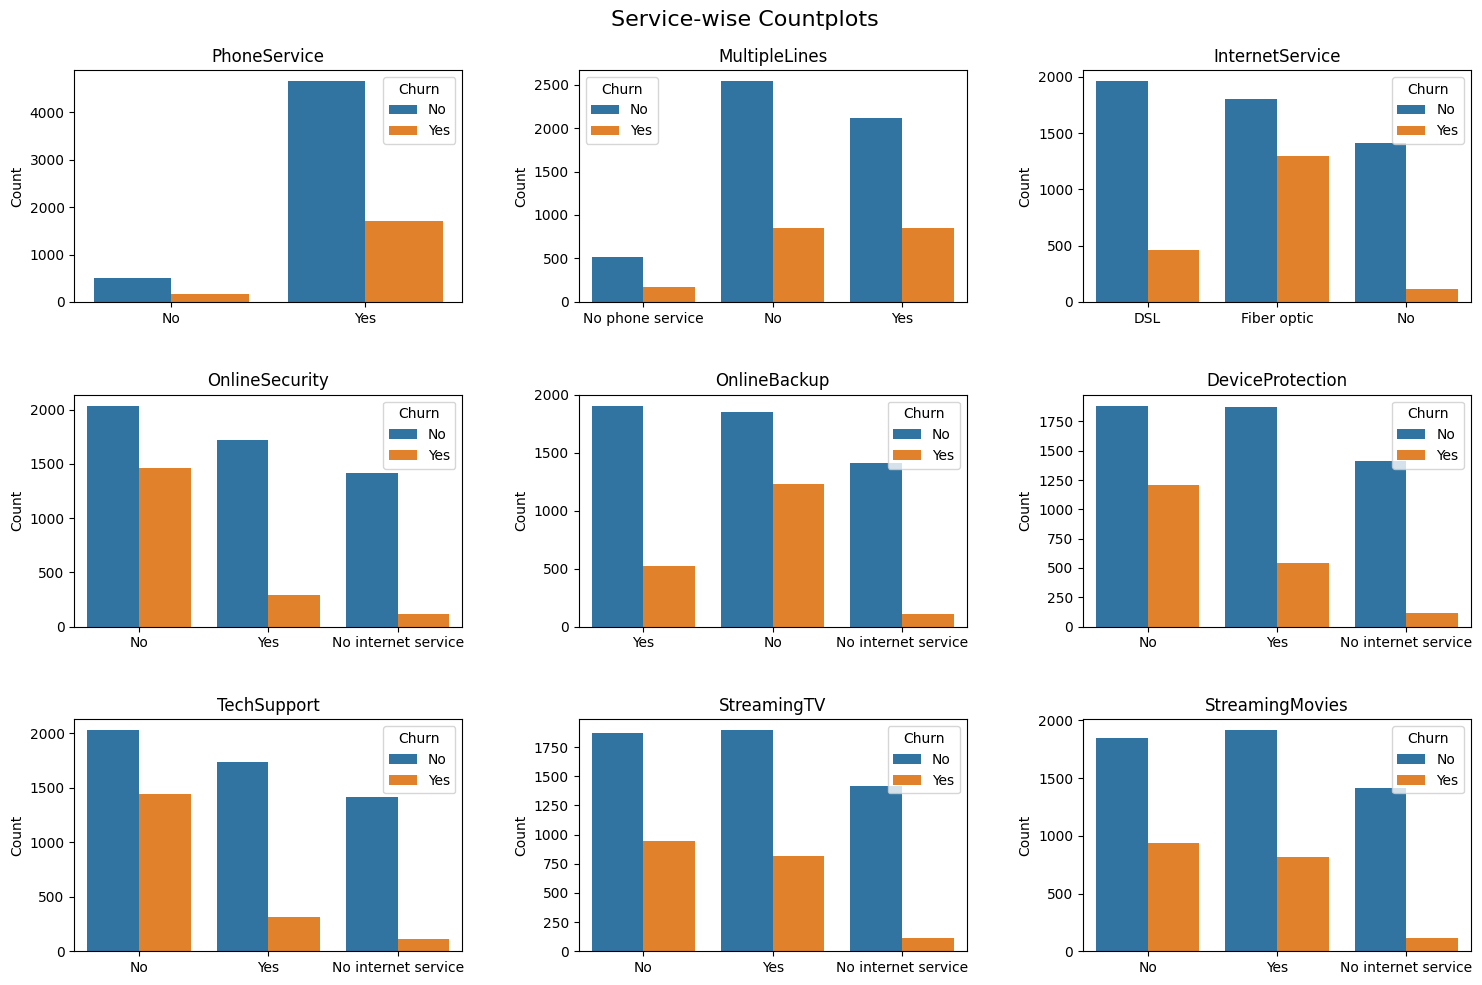

In [72]:
# List of service columns
service_cols = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Subplot grid size
rows = 3
cols = 3

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, 10))
fig.suptitle('Service-wise Countplots', fontsize=16)

# Flatten axes for easy indexing
axes = axes.flatten()

# Plot each countplot
for i, col in enumerate(service_cols):
    sns.countplot(data=df, x=col, ax=axes[i], hue = df['Churn'])
    axes[i].set_title(col)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.subplots_adjust(wspace=0.3, hspace=0.4, top=0.92)
plt.show()

##### From the above plots we can infer that:

1. Customers without services (e.g., OnlineSecurity, TechSupport) tend to churn more than those with them.

2. Fiber optic InternetService users show a noticeably higher churn rate than DSL users.

3. In most services, the "No" users churn more than "Yes" users, highlighting a link between lack of service use and churn.

4. PhoneService and MultipleLines show clear churn differences, especially for those with no or limited access.

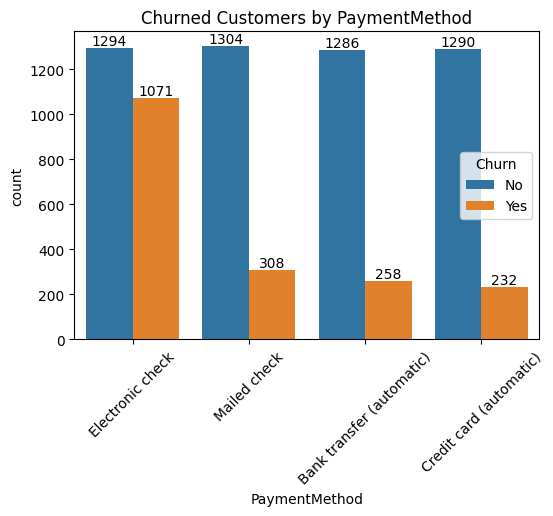

In [77]:
plt.figure(figsize= (6,4))
ax = sns.countplot(x= df['PaymentMethod'], hue = df['Churn'])
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.xticks(rotation = 45)
plt.title('Churned Customers by PaymentMethod')
plt.show()

#### Customer is likely to churn when electronic check is used as a payment method.

# 📄 Summary
#### 📊 Churn Rate:

⇒ 26.54% of customers have churned, indicating a significant retention challenge.

#### 👵 Senior Citizen Impact:

Senior citizens churn more than non-seniors, as shown in the stacked bar chart.

#### ⏳ Tenure-Based Churn:

Customers with tenure of 1–2 months exhibit the highest churn rate based on histogram distribution.

#### 🔐 Contract Type:

Month-to-month contracts have the highest churn rate, clearly visible from the countplot comparison with 1 and 2-year contracts.

#### 💡 Service Usage Trends (via subplots):

Churn is significantly higher among customers not using services like:

- OnlineSecurity

- OnlineBackup

- TechSupport

Also, Fiber optic users churn more than DSL users.

#### 🎯 Key Strategic Actions:
Focus retention efforts on:

- Month-to-month customers

- New joiners with short tenure

- Senior citizens

- Encourage adoption of technical services (security, support, backup)

- Incentivize longer-term contracts to lock in low-churn behavior